Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information


Input variables (based on physicochemical tests):

1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

Data Source: https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from imblearn.over_sampling import SMOTE 

In [2]:
df = pd.read_csv("wine_quality.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
##Lets do an arbitary cutoff for the dependent varaibale here. If the quality is more than 8 --> it is a good quality, otherwise it is a bad quality. 
def quality(x): 
    if x>5: 
        return 1 
    else: 
        return 0

In [6]:
df['quality'] = df['quality'].apply(quality)

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [8]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [9]:
#Checking null values in the dataframe if there is any. 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 1
quality                 0
dtype: int64

In [10]:
## Now since there is one null value in alcohol, we will replace it with the overall mean of the alcohol instead of dropping it here. 
df['alcohol'].fillna(df['alcohol'].mean, axis = 0, inplace = True)

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
np.where(df.alcohol == 'NaN')

(array([], dtype=int64),)

In [13]:
df['alcohol'] = df['alcohol'].replace(" ", np.nan)

In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Since there is no null values in the dataset, we can proceed now! 

# Dataframe description: 

We do have charatersticks variables as independent variable like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfurdioxide, total sulfurdioxiode, density, pH, sulphates, alcohol. 
Dependent variable is quality here. We will be predicting the quality (whether the wine is of good quality depending on the independent variables available or it is not?). 


# Checking the datatypes of the columns: 

In [15]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                   int64
dtype: object

In [16]:
#Since one of the data type is object and continous in nature. We need to make it float. 

In [17]:
df['alcohol'] = pd.to_numeric(df['alcohol'],errors = 'coerce')

In [18]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All of the data are in float types. We can proceed with the data types. 

# Visualization of the data: 

1    854
0    745
Name: quality, dtype: int64


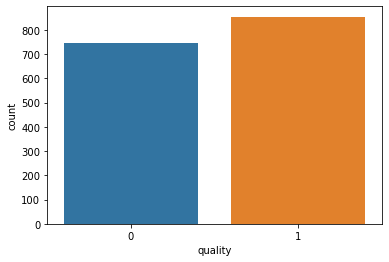

In [19]:
ax = sns.countplot(x = 'quality', data = df)
print(df['quality'].value_counts())

From the above observation: 
The good quality wine is 854 and bad quality wine is 745 as per the chractersticks (in terms of independent variables are given).
The classes are quite inbalanced. This needs to be balanced at the time of data spliting for the model. 

In [20]:
len(df['alcohol'].unique())

66

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

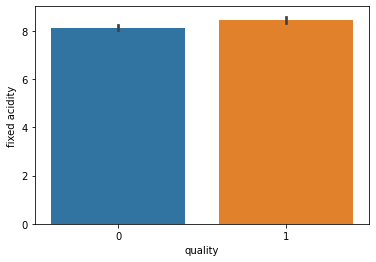

In [21]:
sns.barplot(x ='quality', y = 'fixed acidity', data = df)

Observation: Fixed acidity in terms of proving the quality of wine good is comparitevly higher from bad quality wine. However there is not much difference in the both. 

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

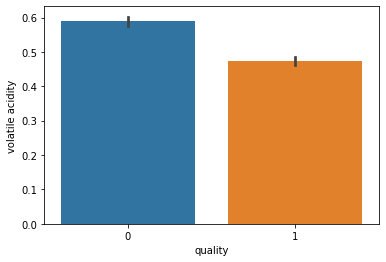

In [22]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

Observation: If volatile acidity in terms of wine quality is higher then it is bad for the wine. It should be less to make the wine qualitative good. 

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

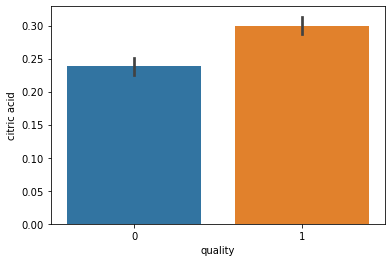

In [23]:
sns.barplot(x = 'quality', y = 'citric acid', data = df)

Observation: Cetric acid needs to be higher to make the quality of wine good. 

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

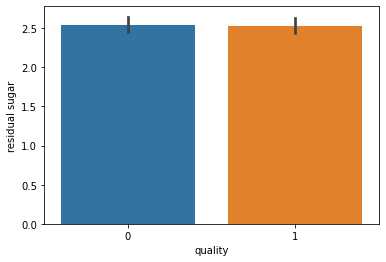

In [24]:
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

Observation: Since in both bad and good wine, residual sugar is of the same level. It portrays residual sugar don't make such difference in quality of the wine. 

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

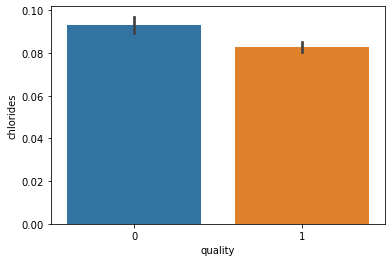

In [25]:
sns.barplot(x = 'quality', y = 'chlorides', data = df)

Observation: Level of chroides need to be less for making the overall quality of wine better. 

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

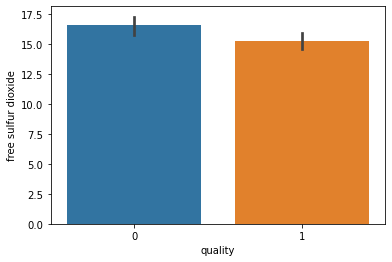

In [26]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

Observation: Free sulfurdioxiode needs to be low for making the good quality wine. However, it doesn't make that much significant difference. 

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

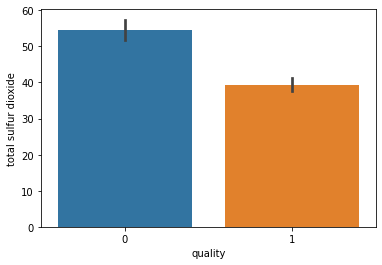

In [27]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

Observation: Total sulfurdioxiode needs to be low for making the good quality wine. 

<AxesSubplot:xlabel='quality', ylabel='density'>

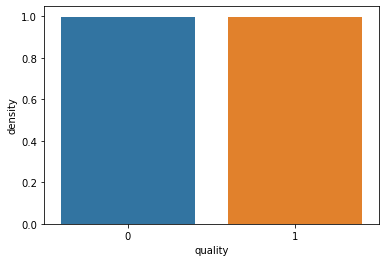

In [28]:
sns.barplot(x = 'quality', y = 'density', data = df)

Observation: Density doesn't make much difference in the overall quality of the wine. It is not that significant in determining the quality of wine. 

<AxesSubplot:xlabel='quality', ylabel='pH'>

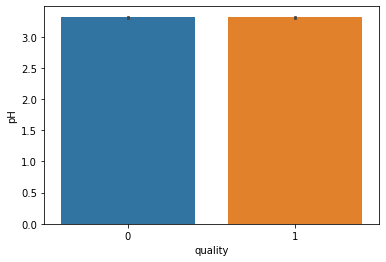

In [29]:
sns.barplot(x = 'quality', y = 'pH', data = df)

Observation: pH doesn't make much difference in the overall quality of the wine. It is not that significant in determining the quality of wine. 

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

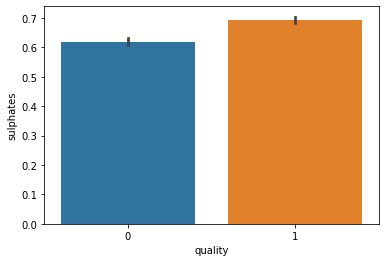

In [30]:
sns.barplot(x = 'quality', y = 'sulphates', data = df)

Observation: The overall level of sulphates need to be more to make the quality of wine significantly better. It is significant in determining the quality of wine. More sulphate --> Better Quality.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

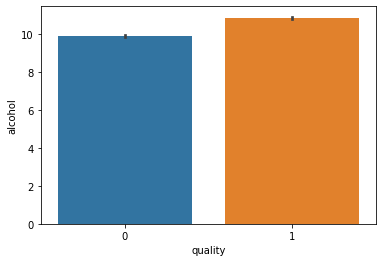

In [31]:
sns.barplot(x = 'quality', y = 'alcohol', data = df)

Observation: The overall level of alcohol need to be more to make the quality of wine significantly better. It is significant in determining the quality of wine. More Alcohol --> Better Quality.

From the bar graph diagrams portrayed above, followng observations can be made:

    1. As the level of volatile acidity, chlorides fall, it increases the overall level of the quality. 
    2. As the level of citric acid, sulphates, alcohol rise, it indreases the overall level of quality.
    3. There is no significant effect on the wine quality due to the residual sugar, free sulfur dioxide, total sulfur dioxide, density and pH. Nothing can be said about their influence on the wine quality. 
    
Note: Alcohol, Sulphates, and Citric acid is significant in determining the quality of wine. As their level increases, it will make the wine more better. 

# Exploratry Data Analysis (EDA): 

In [32]:
df.corr().T

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183294,-0.061256,0.096756
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260708,-0.201988,-0.319888
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312532,0.109603,0.157834
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005360,0.041832,-0.003104
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371343,-0.221026,-0.108939
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051611,-0.069485,-0.062006
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042975,-0.205628,-0.231773
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148648,-0.496068,-0.158261
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196754,0.205495,-0.003905
sulphates,0.183294,-0.260708,0.312532,0.005360,0.371343,0.051611,0.042975,0.148648,-0.196754,1.000000,0.093600,0.218268


<AxesSubplot:>

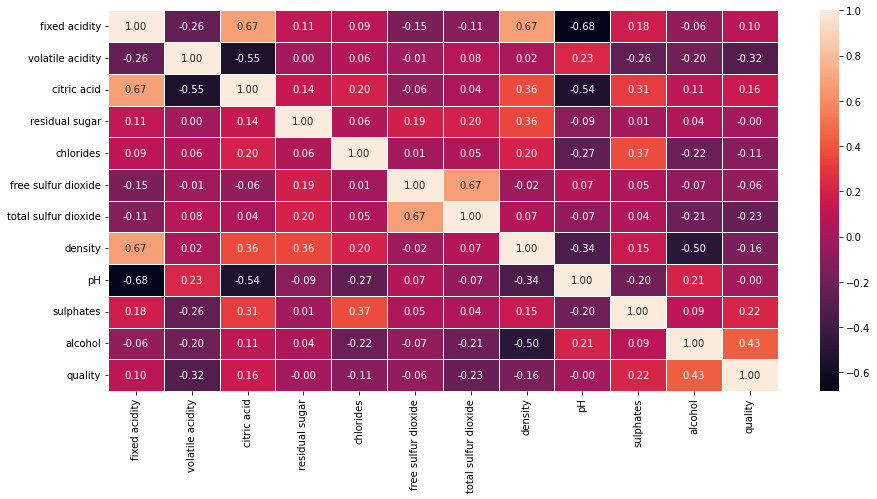

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.2f')

In [34]:
df.corr()['quality'].sort_values()

volatile acidity       -0.319888
total sulfur dioxide   -0.231773
density                -0.158261
chlorides              -0.108939
free sulfur dioxide    -0.062006
pH                     -0.003905
residual sugar         -0.003104
fixed acidity           0.096756
citric acid             0.157834
sulphates               0.218268
alcohol                 0.434593
quality                 1.000000
Name: quality, dtype: float64

Observations from the correlation done above: 
    
    1. Among all variables available, alcohol is highly positively correlated and volatile acidity is highly negatively correlated with quality.
    2. Among independent variables itself, density and alcohol is significantly negatively correlated with each other.Residual sugar and density is significantly positively correlated with each other.

fixed acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
volatile acidity        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
citric acid             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
residual sugar          AxesSubplot(0.731522,0.657941;0.168478x0.222059)
chlorides                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
free sulfur dioxide     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
total sulfur dioxide    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.731522,0.391471;0.168478x0.222059)
pH                            AxesSubplot(0.125,0.125;0.168478x0.222059)
sulphates                  AxesSubplot(0.327174,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

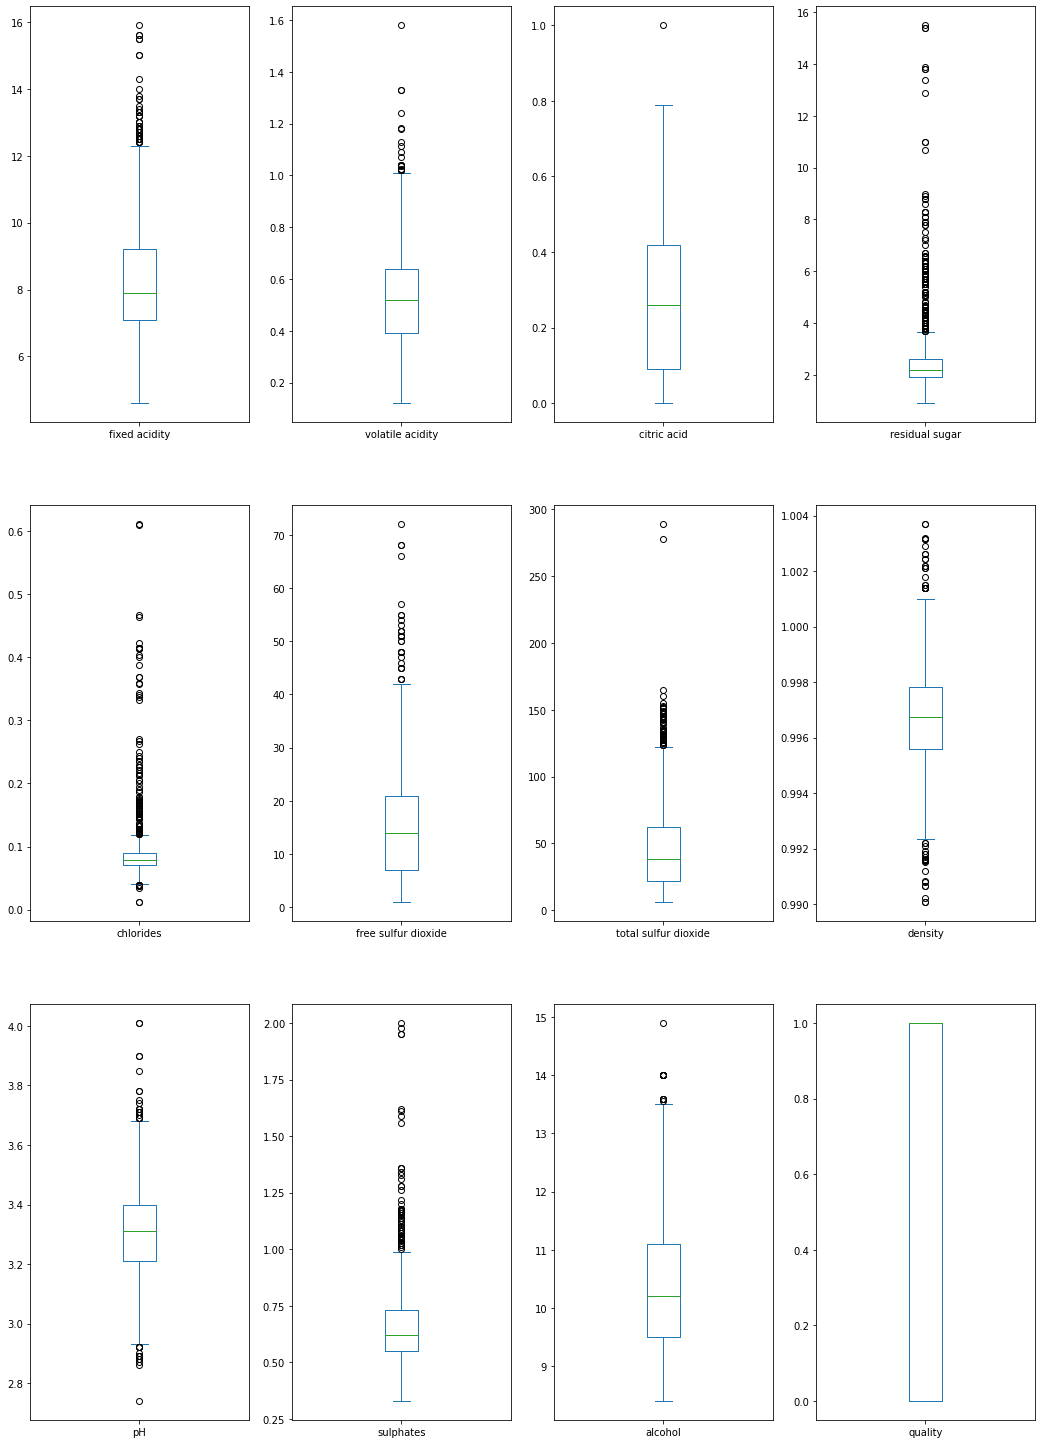

In [35]:
### Checking whether outliers available in the the dataset with boxplot. 
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(18,26))

Observations: 
    
Fixed acidity, volatile acidity, residual sugar, chlroides, free sulfurdiooxide, density, pH, sulphates have high number of outliers present in the dataset. This can be either treated with the boxcox method of scipy stats library or if the variable doesn't have any significance with the quality ----> it can be dropped as well. It will not make much difference in the training of the model. 

<AxesSubplot:ylabel='Density'>

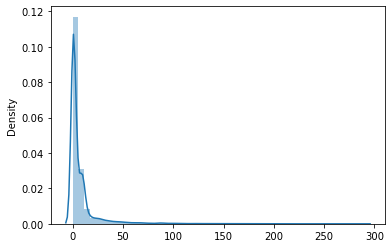

In [36]:
### Checking the level of skewness available in the dataset. 
import warnings
warnings.filterwarnings("ignore")

sns.distplot(df)

Observation: Overall distribution of the population is rightly skewed. Let's check variable wise now. 

In [37]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.429044
alcohol                 0.861715
quality                -0.136781
dtype: float64

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

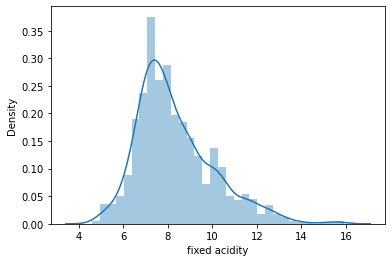

In [38]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

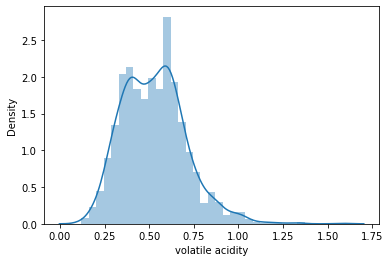

In [39]:
sns.distplot(df['volatile acidity'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

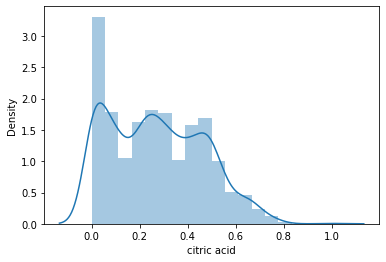

In [40]:
sns.distplot(df['citric acid'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

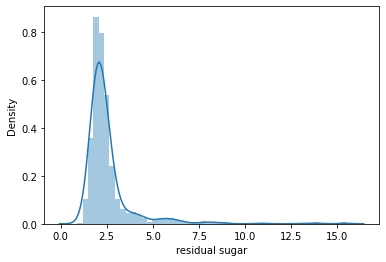

In [41]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

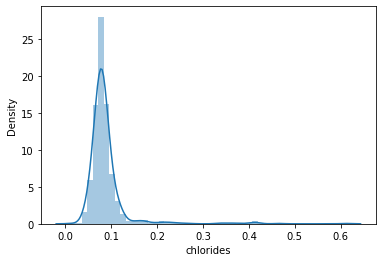

In [42]:
sns.distplot(df['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

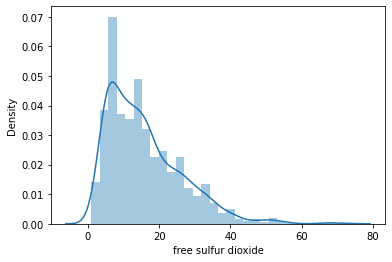

In [43]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

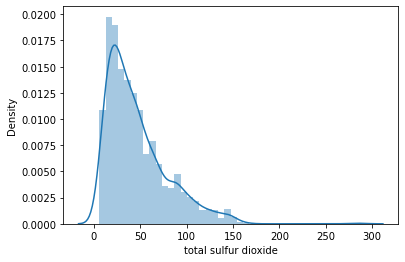

In [44]:
sns.distplot(df['total sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Density'>

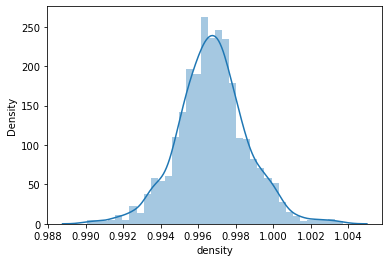

In [45]:
sns.distplot(df['density'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

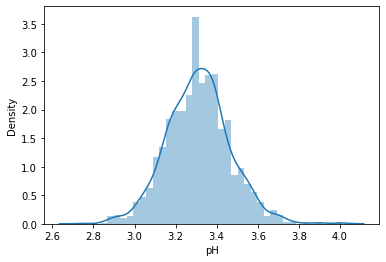

In [46]:
sns.distplot(df['pH'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

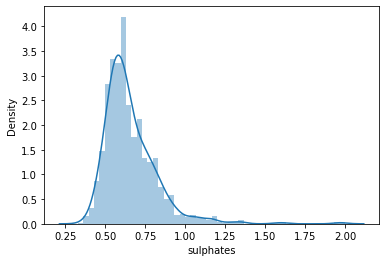

In [47]:
sns.distplot(df['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

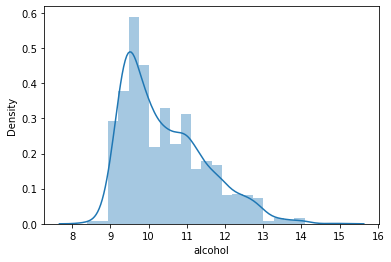

In [48]:
sns.distplot(df['alcohol'])

Observations: 
    
    1. The threshold is -0.5 to 0.5. 
    2. As per the skewness values got above and distance plot of each respective variable - residual sugar, chlorides,free sulfur dioxide, total sulfur dioxide, sulphates are highly skewed. Fxed acidity, volatile acidity, alcohol are averagely skewed. Certain variables including citric acid, density, pH, quality is symmetric to the most extent. 

In [49]:
### Checking multicollinerity. If it exist then correcting it with variance inflation factor.

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [50]:
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [51]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
def df_vif(x): 
    vif = pd.DataFrame()
    vif['Variables'] = x.columns 
    vif['VIF Factors'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [56]:
df_vif(x)

,Variables,VIF Factors
0,fixed acidity,74.765951
1,volatile acidity,17.056740
2,citric acid,9.202067
3,residual sugar,4.660683
4,chlorides,6.556604
5,free sulfur dioxide,6.439793
6,total sulfur dioxide,6.521791
7,density,1479.492342
8,pH,1070.455259
9,sulphates,21.577905


In [57]:
### Since density is having comparitevly higher VIF factor, dropping it here. 

x = df.drop(['density','pH'],axis=1)

Observation: Both the variables - Density anf pH have comparitevly high variance inflation factor.

# Preprocessing the data: 

From the observations of the analysis made above, we can drop certain columns - Volatile Acidity and Density.

1. Since there is negtaive correlation between volatile density and quality; moreover it hold siignifacntly high number of outliers available. It is highly skewed. 
2. There is no significant relation between density and quality of wine. Moreover it is highly negatively correlated with the wine quality. The distribution of the density is highly skewed and it holds comparitevly high number of outliers. 


In [58]:
df.drop(['volatile acidity','density'],axis=1, inplace = True)

In [59]:
df.columns

Index(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

In [60]:
### Removing the outliers now. 

from scipy.stats import zscore 
z = np.abs(zscore(df))

In [61]:
threshold = 3
print(np.where(z>3))
len(np.where(z>3)[0])

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        109,  147,  151,  151,  151,  151,  163,  164,  169,  169,  181,
        226,  226,  240,  243,  244,  258,  258,  274,  281,  291,  324,
        325,  339,  340,  347,  354,  374,  381,  391,  396,  396,  400,
        400,  442,  451,  480,  494,  515,  544,  554,  555,  557,  568,
        584,  591,  595,  614,  636,  639,  649,  649,  651,  652,  652,
        672,  684,  692,  692,  695,  723,  730,  754,  776,  777,  795,
        911,  917,  923,  925,  926,  982, 1043, 1051, 1051, 1071, 1074,
       1079, 1079, 1081, 1081, 1111, 1131, 1154, 1165, 1175, 1186, 1231,
       1235, 1244, 1244, 1244, 1260, 1288, 1289, 1295, 1296, 1300, 1316,
       1319, 1319, 1321, 1358, 1367, 1370, 1370, 1372, 1372, 1374, 1434,
       1434, 1435, 1435, 1474, 1474, 1476, 1476, 1493, 1496, 1558, 1558,
       1570, 1574, 1589], dtype=int64), array([7, 

146

In [62]:
df_new = df[(z<3)]

In [63]:
df.shape

(1599, 10)

In [64]:
df_new.shape

(1599, 10)

# Model Selection: 

In [68]:
df.shape

(1598, 10)

In [65]:
df.dropna( inplace = True)

In [66]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [67]:
x.shape

(1598, 9)

In [69]:
y.shape

(1598,)

# SMOTE (Synthetic Minority Over-Sampling Technique): 

The data in terms of quality is quite unbalanced. We are going to correct it and making the data balanced using SMOTE technique.

In [70]:
y.value_counts()

1    854
0    744
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

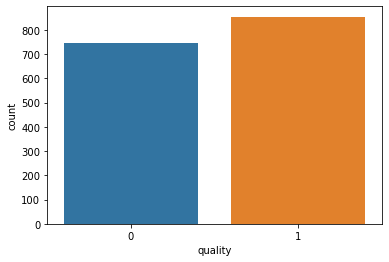

In [71]:
sns.countplot(y)

In [72]:
smt = SMOTE()
X,Y = smt.fit_resample(x,y)

In [73]:
X

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.400000,0.000000,1.900000,0.076000,11.000000,34.000000,3.510000,0.560000,9.400000
1,7.800000,0.000000,2.600000,0.098000,25.000000,67.000000,3.200000,0.680000,9.800000
2,7.800000,0.040000,2.300000,0.092000,15.000000,54.000000,3.260000,0.650000,9.800000
3,11.200000,0.560000,1.900000,0.075000,17.000000,60.000000,3.160000,0.580000,9.800000
4,7.400000,0.000000,1.900000,0.076000,11.000000,34.000000,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...
1703,7.663654,0.000000,2.207597,0.077758,11.000000,34.000000,3.479240,0.546817,9.443942
1704,7.376679,0.143004,2.110672,0.076360,7.446641,28.446641,3.454190,0.630395,9.655336
1705,8.709884,0.402136,2.742296,0.085000,16.324126,110.225291,3.258459,0.613517,9.800000
1706,7.500000,0.360000,6.100000,0.071000,17.000000,102.000000,3.350000,0.800000,10.500000


In [74]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
1703    0
1704    0
1705    0
1706    0
1707    0
Name: quality, Length: 1708, dtype: int64

In [75]:
Y.value_counts()

0    854
1    854
Name: quality, dtype: int64

Now the overall data is balanced. We can proceed with our model.

In [76]:
### Removing skewness now. 
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [78]:
pd.DataFrame(X).skew()

0   -0.000137
1    0.021884
2   -0.015969
3   -0.165336
4   -0.010038
5   -0.003460
6   -0.003012
7    0.014248
8    0.117224
dtype: float64

<AxesSubplot:ylabel='Density'>

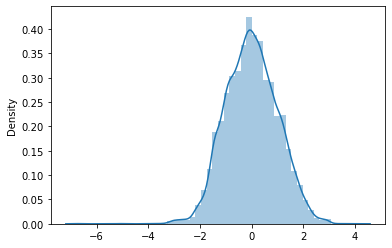

In [79]:
sns.distplot(pd.DataFrame(X))

Now the data is normally distributed. It is comparitevly less skewed.

In [80]:
### Using standardScaler --> scaling all the independent x variables. 
sc=StandardScaler()
X1=sc.fit_transform(X)
X1

array([[-0.44182999, -1.53823758, -0.61007796, ...,  1.28541016,
        -0.55646912, -1.06785326],
       [-0.1553335 , -1.53823758,  0.55387215, ..., -0.72277304,
         0.42930168, -0.47806153],
       [-0.1553335 , -1.25514318,  0.14623233, ..., -0.31841817,
         0.2169706 , -0.47806153],
       ...,
       [ 0.41189443,  0.75938076,  0.71340111, ..., -0.32870328,
        -0.06977455, -0.47806153],
       [-0.36778596,  0.56469028,  2.12517049, ...,  0.27359517,
         1.10916226,  0.32820899],
       [-0.05099436, -0.21087407, -0.4186331 , ...,  0.0801518 ,
        -1.36808947, -0.46500311]])

In [86]:
X = pd.DataFrame(X)

In [87]:
X = pd.DataFrame(X1,columns= X.columns)

In [88]:
X

,0,1,2,3,4,5,6,7,8
0,-0.441830,-1.538238,-0.610078,-0.187156,-0.268008,-0.131938,1.285410,-0.556469,-1.067853
1,-0.155334,-1.538238,0.553872,0.787985,0.990004,0.837310,-0.722773,0.429302,-0.478062
2,-0.155334,-1.255143,0.146232,0.558806,0.192396,0.526228,-0.318418,0.216971,-0.478062
3,1.546924,1.421446,-0.610078,-0.241292,0.383495,0.677865,-0.996800,-0.364542,-0.478062
4,-0.441830,-1.538238,-0.610078,-0.187156,-0.268008,-0.131938,1.285410,-0.556469,-1.067853
...,...,...,...,...,...,...,...,...,...
1703,-0.250144,-1.538238,-0.003309,-0.094338,-0.268008,-0.131938,1.094774,-0.690124,-0.997524
1704,-0.459341,-0.591730,-0.174934,-0.167921,-0.817962,-0.381902,0.938182,0.067022,-0.678803
1705,0.411894,0.759381,0.713401,0.258574,0.321233,1.563994,-0.328703,-0.069775,-0.478062
1706,-0.367786,0.564690,2.125170,-0.467905,0.383495,1.450044,0.273595,1.109162,0.328209


In [89]:
from sklearn.linear_model import LogisticRegression

In [106]:
trainx,testx,trainy,testy = train_test_split(X,Y,test_size = .20, random_state = 138)

In [107]:
LR = LogisticRegression()
LR.fit(trainx, trainy)
predrf = LR.predict(testx)
acc=accuracy_score(testy,predrf)

In [108]:
print(acc)

0.7368421052631579


In [109]:
print(confusion_matrix(testy,predrf))

[[128  49]
 [ 41 124]]


In [110]:
print(classification_report(testy,predrf))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       177
           1       0.72      0.75      0.73       165

    accuracy                           0.74       342
   macro avg       0.74      0.74      0.74       342
weighted avg       0.74      0.74      0.74       342



In [113]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(trainx,trainy)
predgb = gb.predict(testx)
print("Accuracy :",accuracy_score(testy,predgb)*100)
print(confusion_matrix(testy,predgb))
print(classification_report(testy,predgb))

Accuracy : 75.14619883040936
[[132  45]
 [ 40 125]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       177
           1       0.74      0.76      0.75       165

    accuracy                           0.75       342
   macro avg       0.75      0.75      0.75       342
weighted avg       0.75      0.75      0.75       342



In [114]:
dt = DecisionTreeClassifier()
dt.fit(trainx,trainy)
preddt = dt.predict(testx)
print("Accuracy ",accuracy_score(testy,preddt)*100)
print(confusion_matrix(testy,preddt))
print(classification_report(testy,preddt))

Accuracy  78.65497076023392
[[138  39]
 [ 34 131]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       177
           1       0.77      0.79      0.78       165

    accuracy                           0.79       342
   macro avg       0.79      0.79      0.79       342
weighted avg       0.79      0.79      0.79       342



In [115]:
svc = SVC()
svc.fit(trainx,trainy)
predsvc = svc.predict(testx)
print("Accuracy ",accuracy_score(testy,predsvc)*100)
print(confusion_matrix(testy,predsvc))
print(classification_report(testy,predsvc))

Accuracy  78.94736842105263
[[139  38]
 [ 34 131]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       177
           1       0.78      0.79      0.78       165

    accuracy                           0.79       342
   macro avg       0.79      0.79      0.79       342
weighted avg       0.79      0.79      0.79       342



In [118]:
svcp = SVC(kernel='poly')
svcp.fit(trainx,trainy)
predsvcp = svcp.predict(testx)
print("Accuracy ",accuracy_score(testy,predsvcp)*100)
print(confusion_matrix(testy,predsvcp))
print(classification_report(testy,predsvcp))

Accuracy  75.14619883040936
[[142  35]
 [ 50 115]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       177
           1       0.77      0.70      0.73       165

    accuracy                           0.75       342
   macro avg       0.75      0.75      0.75       342
weighted avg       0.75      0.75      0.75       342



In [119]:
svclinear = SVC(kernel='linear')
svclinear.fit(trainx,trainy)
predsvclinear = svclinear.predict(testx)
print("Accuracy ",accuracy_score(testy,predsvclinear)*100)
print(confusion_matrix(testy,predsvclinear))
print(classification_report(testy,predsvclinear))

Accuracy  73.68421052631578
[[130  47]
 [ 43 122]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       177
           1       0.72      0.74      0.73       165

    accuracy                           0.74       342
   macro avg       0.74      0.74      0.74       342
weighted avg       0.74      0.74      0.74       342



In [120]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(trainx,trainy)
knn.score(trainx,trainy)
predknn=knn.predict(testx)
print(accuracy_score(testy,predknn))
print(confusion_matrix(testy,predknn))
print(classification_report(testy,predknn))

0.7543859649122807
[[134  43]
 [ 41 124]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       177
           1       0.74      0.75      0.75       165

    accuracy                           0.75       342
   macro avg       0.75      0.75      0.75       342
weighted avg       0.75      0.75      0.75       342



In [121]:
rf = RandomForestClassifier(n_estimators=100,random_state=93)
rf.fit(trainx,trainy)
predrf = rf.predict(testx)
print(accuracy_score(testy,predrf))
print(confusion_matrix(testy,predrf))
print(classification_report(testy,predrf))

0.8245614035087719
[[147  30]
 [ 30 135]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       177
           1       0.82      0.82      0.82       165

    accuracy                           0.82       342
   macro avg       0.82      0.82      0.82       342
weighted avg       0.82      0.82      0.82       342



In [122]:
ada = AdaBoostClassifier()
ada.fit(trainx,trainy)
predada = ada.predict(testx)
print(accuracy_score(testy,predada))
print(confusion_matrix(testy,predada))
print(classification_report(testy,predada))

0.7573099415204678
[[137  40]
 [ 43 122]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       177
           1       0.75      0.74      0.75       165

    accuracy                           0.76       342
   macro avg       0.76      0.76      0.76       342
weighted avg       0.76      0.76      0.76       342



In [123]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(trainx,trainy)
predgb = gb.predict(testx)
print(accuracy_score(testy,predgb))
print(confusion_matrix(testy,predgb))
print(classification_report(testy,predgb))

0.7719298245614035
[[135  42]
 [ 36 129]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       177
           1       0.75      0.78      0.77       165

    accuracy                           0.77       342
   macro avg       0.77      0.77      0.77       342
weighted avg       0.77      0.77      0.77       342



# Cross-validation

In [126]:
# Logistic Regression
scr = cross_val_score(LR,X,Y,cv=5)
print(" CV score of Logistic Regression model: ",scr.mean())
result = accuracy_score(testy,predrf) - scr.mean()
print("\nAccuracy Score - Cross Validation Score is", result)

 CV score of Logistic Regression model:  0.7066899898818406

Accuracy Score - Cross Validation Score is 0.11787141362693132


In [128]:
# Gaussian Naive Bayes
scr2 = cross_val_score(gb,X,Y,cv=5)
print(" CV score of Logistic Regression model: ",scr2.mean())
result2 = accuracy_score(testy,predgb) - scr2.mean()
print("\nAccuracy Score - Cross Validation Score is", result2)

 CV score of Logistic Regression model:  0.7289156419886471

Accuracy Score - Cross Validation Score is 0.043014182572756354


In [129]:
# DecisionTree
scr3 = cross_val_score(dt,X,Y,cv=5)
print(" CV score of Logistic Regression model: ",scr3.mean())
result3 = accuracy_score(testy,preddt) - scr3.mean()
print("\nAccuracy Score - Cross Validation Score is", result3)

 CV score of Logistic Regression model:  0.6703932362675995

Accuracy Score - Cross Validation Score is 0.11615647133473972


In [130]:
 # SVC Classifier rbf
scr4 = cross_val_score(svc,X,Y,cv=5)
print(" CV score of Logistic Regression model: ",scr4.mean())
result4 = accuracy_score(testy,predsvc) - scr4.mean()
print("\nAccuracy Score - Cross Validation Score is", result4)

 CV score of Logistic Regression model:  0.7418171528528065

Accuracy Score - Cross Validation Score is 0.047656531357719856


In [131]:
 # SVC Classifier poly
scr5 = cross_val_score(svcp,X,Y,cv=5)
print(" CV score of Logistic Regression model: ",scr5.mean())
result5 = accuracy_score(testy,predsvcp) - scr5.mean()
print("\nAccuracy Score - Cross Validation Score is", result5)

 CV score of Logistic Regression model:  0.7207696661007358

Accuracy Score - Cross Validation Score is 0.030692322203357825


In [132]:
 # SVC Classifier linear
scr6 = cross_val_score(svclinear,X,Y,cv=5)
print(" CV score of Logistic Regression model: ",scr6.mean())
result6 = accuracy_score(testy,predsvclinear) - scr6.mean()
print("\nAccuracy Score - Cross Validation Score is", result6)

 CV score of Logistic Regression model:  0.7119565776611617

Accuracy Score - Cross Validation Score is 0.024885527601996138


In [133]:
# KNearest Neighbors Classifier
scr7 = cross_val_score(knn,X,Y,cv=5)
print(" CV score of Logistic Regression model: ",scr7.mean())
result7 = accuracy_score(testy,predknn) - scr7.mean()
print("\nAccuracy Score - Cross Validation Score is", result7)

 CV score of Logistic Regression model:  0.7002298022671536

Accuracy Score - Cross Validation Score is 0.054156162645127126


In [134]:
# Random Forest
scr8 = cross_val_score(rf,X,Y,cv=5)
print(" CV score of Logistic Regression model: ",scr8.mean())
result8 = accuracy_score(testy,predrf) - scr8.mean()
print("\nAccuracy Score - Cross Validation Score is", result8)

 CV score of Logistic Regression model:  0.7253965804050694

Accuracy Score - Cross Validation Score is 0.09916482310370256


In [135]:
# Ada Boosting
scr9 = cross_val_score(ada,X,Y,cv=5)
print(" CV score of Logistic Regression model: ",scr9.mean())
result9 = accuracy_score(testy,predada) - scr9.mean()
print("\nAccuracy Score - Cross Validation Score is", result9)

 CV score of Logistic Regression model:  0.7049356039169282

Accuracy Score - Cross Validation Score is 0.0523743376035396


In [136]:
# Gradient Boosting
scr10 = cross_val_score(gb,X,Y,cv=5)
print(" CV score of Logistic Regression model: ",scr10.mean())
result10 = accuracy_score(testy,predgb) - scr10.mean()
print("\nAccuracy Score - Cross Validation Score is", result10)

 CV score of Logistic Regression model:  0.7300886625165065

Accuracy Score - Cross Validation Score is 0.04184116204489696


 SVC Classifier is performing the best among all so we will perform hyper parameter tuning for it.

# Hyper Parameter Tuning 

In [139]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  # fitting the model for grid search
grid.fit(trainx, trainy)  


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.516 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.520 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.751 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.685 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.734 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [140]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [141]:
grid_predictions = grid.predict(testx)
print(classification_report(testy, grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       177
           1       0.76      0.81      0.78       165

    accuracy                           0.78       342
   macro avg       0.78      0.78      0.78       342
weighted avg       0.79      0.78      0.78       342



In [142]:
accuracy_score(testy,grid_predictions)

0.783625730994152

# AUC ROC Curve

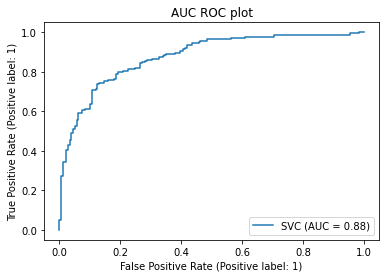

In [143]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid.best_estimator_, testx, testy)
plt.title("AUC ROC plot")
plt.show()

AUC score is 88% which is comparitevly better.

# Saving the model now

In [144]:
# pickeling or serialization of a file
import pickle
filename = 'red_wine_quality_prediction.pkl'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

The end.